In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, r2_score
import seaborn as sns
from scipy import stats
import statsmodels
import statsmodels.api as sm
import pickle

In [2]:
train_df = pd.read_csv('./dataset/train.csv')
test_df = pd.read_csv('./dataset/test.csv')
test_y = pd.read_csv('./dataset/test_y.csv')
sig = 0.01

In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
test_y.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [6]:
train_df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [7]:
test_df.describe(include='all')

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,418.000000,418.000000,418,418,332.000000,418.000000,418.000000,418,417.000000,91,418
unique,NaN,NaN,418,2,NaN,NaN,NaN,363,NaN,76,3
top,NaN,NaN,"Kelly, Mr. James",male,NaN,NaN,NaN,PC 17608,NaN,B57 B59 B63 B66,S
freq,NaN,NaN,1,266,NaN,NaN,NaN,5,NaN,3,270
mean,1100.500000,2.265550,NaN,NaN,30.272590,0.447368,0.392344,NaN,35.627188,NaN,NaN
std,120.810458,0.841838,NaN,NaN,14.181209,0.896760,0.981429,NaN,55.907576,NaN,NaN
min,892.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,996.250000,1.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,1100.500000,3.000000,NaN,NaN,27.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1204.750000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.500000,NaN,NaN


In [8]:
test_y.describe(include='all')

,PassengerId,Survived
count,418.000000,418.000000
mean,1100.500000,0.363636
std,120.810458,0.481622
min,892.000000,0.000000
25%,996.250000,0.000000
50%,1100.500000,0.000000
75%,1204.750000,1.000000
max,1309.000000,1.000000


In [9]:
new_test = test_df.merge(test_y, left_on='PassengerId', right_on='PassengerId', suffixes=('_', '_'))

In [10]:
new_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


In [11]:
train_df = pd.concat([train_df, new_test])

In [12]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


## Check for missing data

In [13]:
# percentage of missing data per column in train_df
train_df.isnull().mean()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.200917
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000764
Cabin          0.774637
Embarked       0.001528
dtype: float64

'Age', 'Cabin', 'Embarked' and 'Fare' contain missing data. Since most of 'Cabin's data is missing, it's best to discard the variable

### Treat age missing data

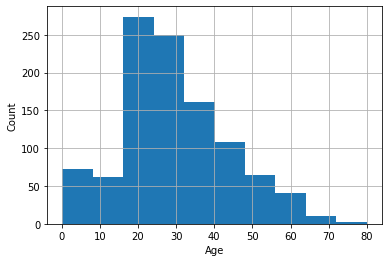

In [14]:
ax = train_df['Age'].hist()
ax.set(xlabel='Age', ylabel='Count')
plt.show()

In [15]:
k2, p_age_train = stats.shapiro(train_df['Age'].dropna())

if (p_age_train < sig):
    print('''Not normal. Using median instead of mean to avoid biasing
''')
else:
    print ('Normal. Using mean') 

Not normal. Using median instead of mean to avoid biasing



In [16]:
median_age_in_train_set = train_df['Age'].median(skipna=True)
median_age_in_train_set

28.0

In [17]:
train_df['Age'].fillna(median_age_in_train_set, inplace=True)

In [18]:
# check that there are no more na in train_df['Age']
print('Missing values in train_df["Age"]: ', train_df['Age'].isnull().sum())

Missing values in train_df["Age"]:  0


### Treat embarked missing data

In [19]:
train_df['Embarked'].value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [20]:
embarked_value_with_most_occurences = 'S'

train_df['Embarked'].fillna(embarked_value_with_most_occurences, inplace=True)

In [21]:
# check that there are no more na for embarked in train_df
print("Missing values in train_df['Embarked']: ", train_df['Embarked'].isnull().sum())

Missing values in train_df['Embarked']:  0


### Drop variable 'cabin'

Because most of its data is null

In [22]:
train_df.drop(columns='Cabin', inplace=True)

### Treat 'fare' missing data

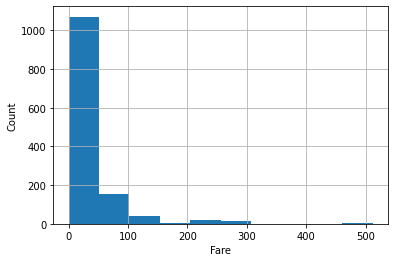

In [23]:
ax = train_df['Fare'].hist()
ax.set(xlabel='Fare', ylabel='Count')
plt.show()

In [24]:
k2, p_fare_train = stats.shapiro(test_df['Fare'])

if (p_fare_train < sig):
    print('''Not normal. Using median instead of mean to avoid biasing
''')
else:
    print ('Normal. Using mean') 

Normal. Using mean


In [25]:
mean_fare_train_df = train_df['Fare'].mean()
mean_fare_train_df

33.29547928134557

In [26]:
train_df['Fare'].fillna(mean_fare_train_df, inplace=True)

In [27]:
# check there are no more na for fare in test_df
print("Missing values in train_df['Fare']: ", train_df['Fare'].isnull().sum())

Missing values in train_df['Fare']:  0


### Check statistics after changes

In [28]:
# percentage of missing data in train_df
train_df.isnull().mean()

PassengerId    0.0
Survived       0.0
Pclass         0.0
Name           0.0
Sex            0.0
Age            0.0
SibSp          0.0
Parch          0.0
Ticket         0.0
Fare           0.0
Embarked       0.0
dtype: float64

In [29]:
train_df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
count,1309.000000,1309.000000,1309.000000,1309,1309,1309.000000,1309.000000,1309.000000,1309,1309.000000,1309
unique,NaN,NaN,NaN,1307,2,NaN,NaN,NaN,929,NaN,3
top,NaN,NaN,NaN,"Connolly, Miss. Kate",male,NaN,NaN,NaN,CA. 2343,NaN,S
freq,NaN,NaN,NaN,2,843,NaN,NaN,NaN,11,NaN,916
mean,655.000000,0.377387,2.294882,NaN,NaN,29.503186,0.498854,0.385027,NaN,33.295479,NaN
std,378.020061,0.484918,0.837836,NaN,NaN,12.905241,1.041658,0.865560,NaN,51.738879,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN
25%,328.000000,0.000000,2.000000,NaN,NaN,22.000000,0.000000,0.000000,NaN,7.895800,NaN
50%,655.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN
75%,982.000000,1.000000,3.000000,NaN,NaN,35.000000,1.000000,0.000000,NaN,31.275000,NaN


#### Variable Notes

**pclass**: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

**age**: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

**sibsp**: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

**parch**: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

### Data dictionary

| Variable | Definition                                  | Key                                            |
| -------- | ------------------------------------------- | ---------------------------------------------- |
| survival | Survival                                    | 0 = No, 1 = Yes                                |
| pclass   | Ticket class                                | 1 = 1st, 2 = 2nd, 3 = 3rd                      |
| sex      | Sex                                         |                                                |
| Age      | Age in years                                |                                                |
| sibsp    | \# of siblings / spouses aboard the Titanic |                                                |
| parch    | \# of parents / children aboard the Titanic |                                                |
| ticket   | Ticket number                               |                                                |
| fare     | Passenger fare                              |                                                |
| cabin    | Cabin number                                |                                                |
| embarked | Port of Embarkation                         | C = Cherbourg, Q = Queenstown, S = Southampton |

From the variable notes, I believe there could be cases where 'sbisp' and 'parch' represent the same people and that could be a problem for estimators. Not travelling alone might change the odds of survival, so discarding them is not an option. But joining them is.

In [30]:
# check values
train_df['SibSp'].value_counts()

0    891
1    319
2     42
4     22
3     20
8      9
5      6
Name: SibSp, dtype: int64

In [31]:
# check values
train_df['Parch'].value_counts()

0    1002
1     170
2     113
3       8
5       6
4       6
6       2
9       2
Name: Parch, dtype: int64

In [32]:
train_df['Aux'] = train_df['SibSp'] + train_df['Parch']
train_df['Aux'].value_counts()

0     790
1     235
2     159
3      43
5      25
4      22
6      16
10     11
7       8
Name: Aux, dtype: int64

In [33]:
train_df['TravelledAlone'] = np.where(train_df['Aux'] != 0, 0, 1)
train_df['TravelledAlone'].value_counts()

1    790
0    519
Name: TravelledAlone, dtype: int64

In [34]:
train_df.drop(columns=['SibSp', 'Parch', 'Aux'], inplace=True)
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,TravelledAlone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,S,1
...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,28.0,A.5. 3236,8.0500,S,1
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,PC 17758,108.9000,C,1
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,SOTON/O.Q. 3101262,7.2500,S,1
416,1308,0,3,"Ware, Mr. Frederick",male,28.0,359309,8.0500,S,1


#### Pclass vs Fare

Variables "Pclass" and "Fare" might also represent the same information and be proxies to each other. That could also pose a problem for estimators. If that's the case, we should have Fare(Pclass==1) > Fare(Pclass==2) > Fare(Pclass==3). Let's check:

In [35]:
print("Mean fare for Pclass 1: ", train_df.loc[train_df['Pclass'] == 1, 'Fare'].mean())
print("Median fare for Pclass 1: ", train_df.loc[train_df['Pclass'] == 1, 'Fare'].median())

Mean fare for Pclass 1:  87.50899164086688
Median fare for Pclass 1:  60.0


In [36]:
print("Mean fare for Pclass 2: ", train_df.loc[train_df['Pclass'] == 2, 'Fare'].mean())
print("Median fare for Pclass 2: ", train_df.loc[train_df['Pclass'] == 2, 'Fare'].median())

Mean fare for Pclass 2:  21.1791963898917
Median fare for Pclass 2:  15.0458


In [37]:
print("Mean fare for Pclass 3: ", train_df.loc[train_df['Pclass'] == 3, 'Fare'].mean())
print("Median fare for Pclass 3: ", train_df.loc[train_df['Pclass'] == 3, 'Fare'].median())

Mean fare for Pclass 3:  13.33108699475507
Median fare for Pclass 3:  8.05


So, Fare(Pclass==1) > Fare(Pclass==2) > Fare(Pclass==3).

Dropping 'Fare'

In [38]:
train_df.drop(columns='Fare', inplace=True)
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Embarked,TravelledAlone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,S,1
...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,28.0,A.5. 3236,S,1
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,PC 17758,C,1
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,SOTON/O.Q. 3101262,S,1
416,1308,0,3,"Ware, Mr. Frederick",male,28.0,359309,S,1


#### PassengerId, Name and Ticket are not relevant

I'm assuming it's unlikely those variables had any effect on survival rate.

In [39]:
train_df.drop(columns=['PassengerId', 'Name', 'Ticket'], inplace=True)
train_df

,Survived,Pclass,Sex,Age,Embarked,TravelledAlone
0,0,3,male,22.0,S,0
1,1,1,female,38.0,C,0
2,1,3,female,26.0,S,1
3,1,1,female,35.0,S,0
4,0,3,male,35.0,S,1
...,...,...,...,...,...,...
413,0,3,male,28.0,S,1
414,1,1,female,39.0,C,1
415,0,3,male,38.5,S,1
416,0,3,male,28.0,S,1


Let's create dummies for the categorical variables

In [40]:
train_df_with_dummies = pd.get_dummies(train_df, columns=['Pclass', 'Sex', 'Embarked'])
train_df_with_dummies

,Survived,Age,TravelledAlone,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,22.0,0,0,0,1,0,1,0,0,1
1,1,38.0,0,1,0,0,1,0,1,0,0
2,1,26.0,1,0,0,1,1,0,0,0,1
3,1,35.0,0,1,0,0,1,0,0,0,1
4,0,35.0,1,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
413,0,28.0,1,0,0,1,0,1,0,0,1
414,1,39.0,1,1,0,0,1,0,1,0,0
415,0,38.5,1,0,0,1,0,1,0,0,1
416,0,28.0,1,0,0,1,0,1,0,0,1


In [41]:
train_df_with_dummies.drop(columns=['Pclass_3', 'Sex_female', 'Embarked_S'], inplace=True)
train_df_with_dummies

,Survived,Age,TravelledAlone,Pclass_1,Pclass_2,Sex_male,Embarked_C,Embarked_Q
0,0,22.0,0,0,0,1,0,0
1,1,38.0,0,1,0,0,1,0
2,1,26.0,1,0,0,0,0,0
3,1,35.0,0,1,0,0,0,0
4,0,35.0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...
413,0,28.0,1,0,0,1,0,0
414,1,39.0,1,1,0,0,1,0
415,0,38.5,1,0,0,1,0,0
416,0,28.0,1,0,0,1,0,0


### Plotting variables against "Survived"

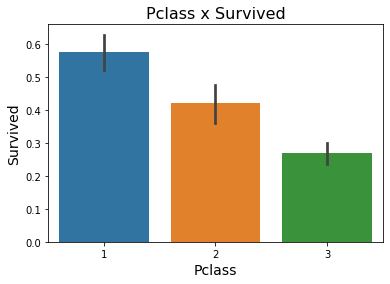

In [42]:
b = sns.barplot(x='Pclass', y='Survived', data=train_df)
b.axes.set_title("Pclass x Survived", fontsize=16)
b.set_xlabel("Pclass", fontsize=14)
b.set_ylabel("Survived", fontsize=14)
plt.show()

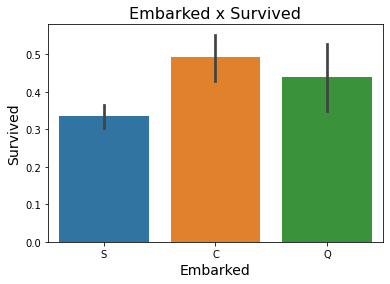

In [43]:
b = sns.barplot(x="Embarked", y="Survived", data=train_df)
b.axes.set_title("Embarked x Survived", fontsize=16)
b.set_xlabel("Embarked", fontsize=14)
b.set_ylabel("Survived", fontsize=14)
plt.show()

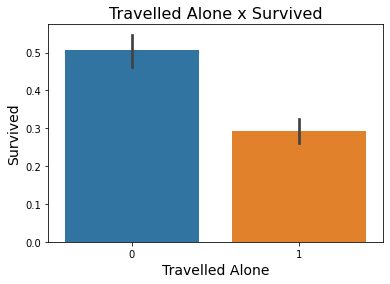

In [44]:
b = sns.barplot(x="TravelledAlone", y="Survived", data=train_df)
b.axes.set_title("Travelled Alone x Survived", fontsize=16)
b.set_xlabel("Travelled Alone", fontsize=14)
b.set_ylabel("Survived", fontsize=14)
plt.show()

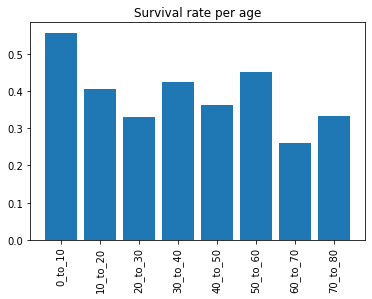

In [45]:
survival_rate_per_age = dict()
survived_already_counted = 0
total_already_counted = 0
binsize = 10
bins = int(train_df['Age'].max() / binsize)
lower_limit = 0
upper_limit = lower_limit + binsize

for x in range(0, bins):
    current_survived = train_df.loc[train_df['Age'] <= upper_limit, 'Survived'].sum() - survived_already_counted
    current_total = train_df.loc[train_df['Age'] <= upper_limit, 'Age'].value_counts().sum() - total_already_counted
    
    current_survival_rate = current_survived / current_total
    
    survival_rate_per_age[f'{lower_limit}_to_{upper_limit}'] = current_survival_rate
    
    survived_already_counted += current_survived
    total_already_counted += current_total
    lower_limit += binsize
    upper_limit += binsize
    
data = survival_rate_per_age
names = list(data.keys())
values = list(data.values())

plt.bar(range(len(data)), values, tick_label=names)
plt.title("Survival rate per age")
plt.xticks(rotation='vertical')
plt.show()

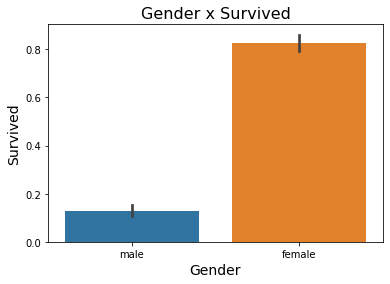

In [46]:
b = sns.barplot(x="Sex", y="Survived", data=train_df)
b.axes.set_title("Gender x Survived", fontsize=16)
b.set_xlabel("Gender", fontsize=14)
b.set_ylabel("Survived", fontsize=14)
plt.show()

In [47]:
'''experimented with statsmodels and found out this combination of 
dummies produces the best results'''

train_df_with_dummies

,Survived,Age,TravelledAlone,Pclass_1,Pclass_2,Sex_male,Embarked_C,Embarked_Q
0,0,22.0,0,0,0,1,0,0
1,1,38.0,0,1,0,0,1,0
2,1,26.0,1,0,0,0,0,0
3,1,35.0,0,1,0,0,0,0
4,0,35.0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...
413,0,28.0,1,0,0,1,0,0
414,1,39.0,1,1,0,0,1,0
415,0,38.5,1,0,0,1,0,0
416,0,28.0,1,0,0,1,0,0


In [48]:
columns = ['Age', 'TravelledAlone', 'Pclass_1', 'Pclass_2', 'Sex_male', 'Embarked_C', 'Embarked_Q']
X = train_df_with_dummies[columns]
y = train_df_with_dummies['Survived']

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [50]:
X_train

,Age,TravelledAlone,Pclass_1,Pclass_2,Sex_male,Embarked_C,Embarked_Q
282,28.0,1,0,0,0,0,1
342,28.0,1,0,1,1,0,0
168,28.0,1,1,0,1,0,0
493,71.0,1,1,0,1,1,0
383,19.0,0,0,0,0,0,0
...,...,...,...,...,...,...,...
204,25.0,1,0,1,1,0,0
239,48.0,0,1,0,0,1,0
403,17.0,1,1,0,1,0,0
860,41.0,0,0,0,1,0,0


In [51]:
y_train

282    1
342    0
168    0
493    0
383    1
      ..
204    0
239    1
403    0
860    0
235    0
Name: Survived, Length: 1112, dtype: int64

In [52]:
logit_model = LogisticRegression()

In [53]:
logit_model.fit(X_train, y_train)

LogisticRegression()

In [54]:
logit_model.score(X_test, y_test)

0.8477157360406091

In [55]:
logit_model.feature_names_in_

array(['Age', 'TravelledAlone', 'Pclass_1', 'Pclass_2', 'Sex_male',
       'Embarked_C', 'Embarked_Q'], dtype=object)

In [56]:
accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, r2_score
y_pred = logit_model.predict(X_test)
print(f'''Model stats:
Accuracy: {accuracy_score(y_test, y_pred)}
F1: {f1_score(y_test, y_pred)}
Precision: {precision_score(y_test, y_pred)}
Recall: {recall_score(y_test, y_pred)}
ROC: {roc_auc_score(y_test, y_pred)}
R²: {r2_score(y_test, y_pred)}''')

Model stats:
Accuracy: 0.8477157360406091
F1: 0.8051948051948052
Precision: 0.8611111111111112
Recall: 0.7560975609756098
ROC: 0.8345705196182398
R²: 0.3732767762460233


In [57]:
test_dict = {
    'Age': [0.5],
    # variables below are all dummies
    'TravelledAlone': [1], 
    'Pclass_1': [0], 
    'Pclass_2': [1], 
    'Sex_male': [0], 
    'Embarked_C': [1], 
    'Embarked_Q': [0]
}

test_array = pd.DataFrame(test_dict)
test_result = logit_model.predict(test_array)

if test_result[0] == 1:
    print("Passenger probably would have survived")
else:
    print("Passenger probably wouldn't have survived")

Passenger probably would have survived
